In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('asteroid_data.csv')

# Examining the dataset

In [3]:
df.head()

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False


Define a label:

If distance < 1 million km and size > 140m → "High Risk"

Else if either condition met → "Medium Risk"

Else → "Low Risk"

👉 This creates a supervised dataset for ML.

In [4]:
max(df['diameter_km'])

3.855

Creating the parameter risk. Initially this was considered for the target variable.

In [5]:
conditions = [
    (df['distance_km'] < 1000000) & (df['diameter_km'] > 1.40),
    (df['distance_km'] < 1000000) | (df['diameter_km'] > 1.40)
]

# Define the choices
choices = ['High Risk', 'Medium Risk']

# Create the 'risk' column
df['risk'] = np.select(conditions, choices, default='Low Risk')


In [6]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk
...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk


In [7]:
# Define the mapping
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

# Apply the mapping
df['risk_numeric'] = df['risk'].map(risk_mapping)

In [8]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk,0
...,...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk,0
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk,0
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk,0
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk,0


In [9]:
# prompt: Print all the values possible in is_hazardous as a set

print(set(df['is_hazardous']))

{False, True}


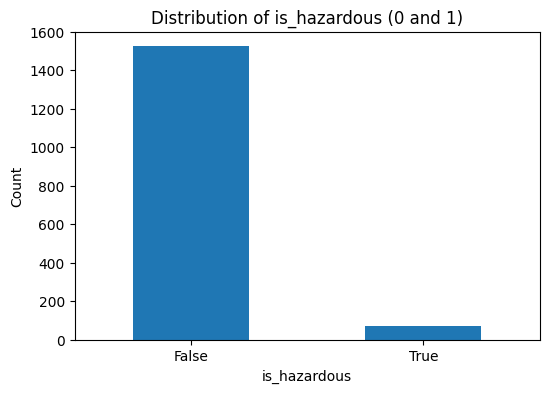

In [10]:
# prompt: plot the distribution of 0 and 1 in is_hazardous

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['is_hazardous'].value_counts().plot(kind='bar')
plt.title('Distribution of is_hazardous (0 and 1)')
plt.xlabel('is_hazardous')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# EDA

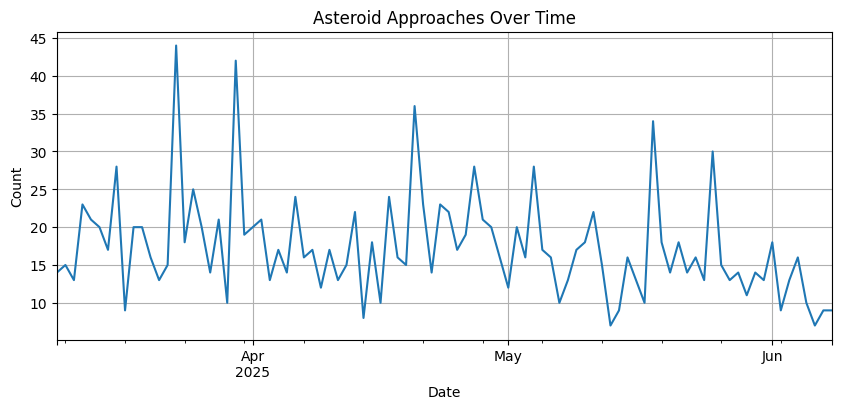

In [11]:
df['approach_date'] = pd.to_datetime(df['approach_date'])
daily_counts = df.groupby('approach_date').size()

import matplotlib.pyplot as plt
daily_counts.plot(title='Asteroid Approaches Over Time', figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Date is meangingless in the scale of time in space

In [12]:
# prompt: replace 'False' with 0 and 'True' with 1 in is_hazardous

df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})
df.head()

C:\Users\gautu\AppData\Local\Temp\ipykernel_23840\2303503372.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})


,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,0,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,0,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,0,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,0,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,0,Low Risk,0


In [13]:
# prompt: Using dataframe df: Drop the column risk and rename risk_numeric to risk

# Drop the column 'risk'
df = df.drop('risk', axis=1)

# Rename the column 'risk_numeric' to 'risk'
df = df.rename(columns={'risk_numeric': 'risk'})

In [14]:
new_df = df[['diameter_km', 'velocity_kmph', 'distance_km','is_hazardous','risk']]

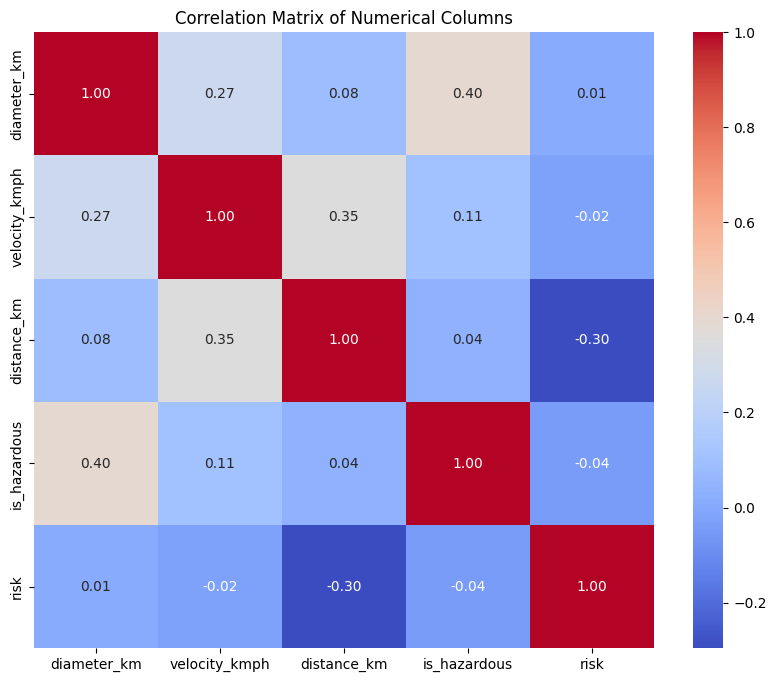

In [15]:
# prompt: Create correlation matrix for all columns with seaborn

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


Seems that distance_km has the highest correlation

#### 1. **`diameter_km` vs `is_hazardous` → 0.40**

* **Moderate positive correlation**
* 🚀 Bigger asteroids are *more likely* to be classified as hazardous.
* This makes sense scientifically — larger objects cause more damage if they hit.

---

#### 2. **`velocity_kmph` vs `distance_km` → 0.35**

* Slight positive correlation
* 🛰️ Faster asteroids tend to pass at a slightly greater distance. Possibly a detection bias or physical trend, but weak.

---

#### 3. **`distance_km` vs `risk` → -0.30**

* ❗ Weak-to-moderate **negative** correlation
* As expected: **closer asteroids = higher risk**

---

#### 4. **`diameter_km`, `velocity_kmph`, and `distance_km` vs `risk` → all \~0 to -0.30**

* Low correlations, but `distance_km` has the strongest impact on `risk`
* Suggests that `risk` may be more dependent on a **combination** of features rather than any one factor

---

#### 5. **`is_hazardous` vs `risk` → -0.04**

* Basically no correlation



Not much information available to clarify the logic for using is_hazardous

In [16]:
new_df

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,0.045,49511.25,50442662.03,0,0
1,0.082,11950.19,70450034.10,0,0
2,0.036,25733.18,54278219.47,0,0
3,0.149,80619.27,23118633.90,0,0
4,0.027,40999.06,36304847.90,0,0
...,...,...,...,...,...
1590,0.187,86494.30,27568592.00,0,0
1591,0.063,48490.37,7719477.82,0,0
1592,0.042,8333.79,14738665.39,0,0
1593,0.059,35613.66,4999225.93,0,0


Creating new parameter risk score that is a combination of several factors. This is because risk factor had reasonable correlation with certain other parameters

In [17]:
# prompt: Replace risk with a new parameter risk_score. risk_score is the product of diameter and square of velocity, divided by the distance_km

new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']
new_df = new_df.drop('risk', axis=1)
# df = df.drop('risk_numeric', axis=1)
new_df.head()

C:\Users\gautu\AppData\Local\Temp\ipykernel_23840\3933996771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']


,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,2.186867
1,0.082,11950.19,70450034.10,0,0.166220
2,0.036,25733.18,54278219.47,0,0.439202
3,0.149,80619.27,23118633.90,0,41.889177
4,0.027,40999.06,36304847.90,0,1.250106


In [18]:
# prompt: Split the data into a 80:20 train test dataset. The target variable is is_hazardous

from sklearn.model_selection import train_test_split

X = new_df.drop('is_hazardous', axis=1)  # Features
y = new_df['is_hazardous']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

Training set shape (X_train, y_train): (1276, 4), (1276,)
Testing set shape (X_test, y_test): (319, 4), (319,)


In [30]:
print("Train set distribution:")
print(y_train.value_counts(normalize=True))

print("Test set distribution:")
print(y_test.value_counts(normalize=True))


Train set distribution:
is_hazardous
0    0.955329
1    0.044671
Name: proportion, dtype: float64
Test set distribution:
is_hazardous
0    0.956113
1    0.043887
Name: proportion, dtype: float64


In [20]:
# 2. Fit the scaler only on training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [21]:
new_df

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,2.186867
1,0.082,11950.19,70450034.10,0,0.166220
2,0.036,25733.18,54278219.47,0,0.439202
3,0.149,80619.27,23118633.90,0,41.889177
4,0.027,40999.06,36304847.90,0,1.250106
...,...,...,...,...,...
1590,0.187,86494.30,27568592.00,0,50.746021
1591,0.063,48490.37,7719477.82,0,19.189498
1592,0.042,8333.79,14738665.39,0,0.197914
1593,0.059,35613.66,4999225.93,0,14.968644


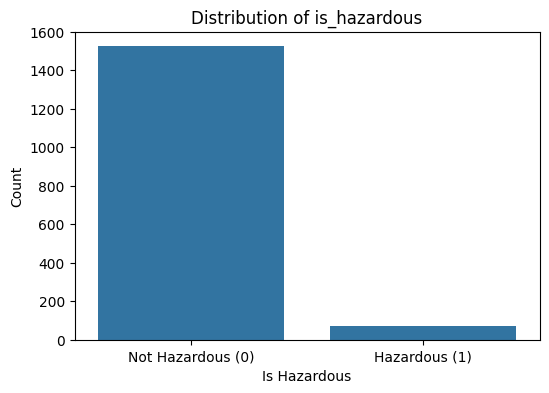

In [22]:
# prompt: Plot the distribution of is_hazardous

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of is_hazardous')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hazardous (0)', 'Hazardous (1)'])
plt.show()


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Original training set shape (X_train, y_train): (1276, 4), (1276,)
Resampled training set shape (X_resampled, y_resampled): (2438, 4), (2438,)

Distribution of 'is_hazardous' in original training set:
is_hazardous
0    1219
1      57
Name: count, dtype: int64

Distribution of 'is_hazardous' in resampled training set:
is_hazardous
0    1219
1    1219
Name: count, dtype: int64


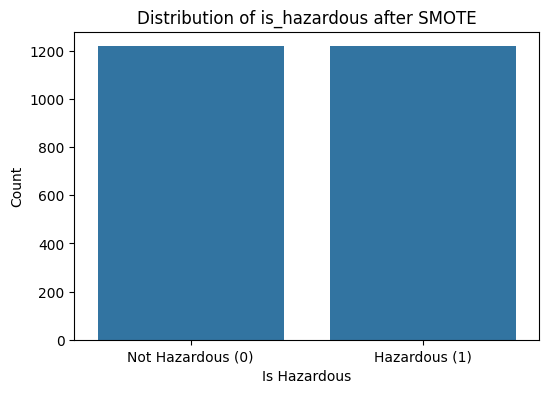

In [23]:
# prompt: Use SMOTE to generate hazardous = 1

import matplotlib.pyplot as plt
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape (X_resampled, y_resampled): {X_resampled.shape}, {y_resampled.shape}")

# Check the distribution of the target variable after SMOTE
print("\nDistribution of 'is_hazardous' in original training set:")
print(y_train.value_counts())

print("\nDistribution of 'is_hazardous' in resampled training set:")
print(y_resampled.value_counts())

# Optional: Visualize the new distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Distribution of is_hazardous after SMOTE')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hazardous (0)', 'Hazardous (1)'])
plt.show()

In [32]:
print("resampled train set distribution:")
print(y_resampled.value_counts(normalize=True))


resampled train set distribution:
is_hazardous
0    0.5
1    0.5
Name: proportion, dtype: float64


# Model training

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_rbf = {
    'C': [1, 10],
    'gamma': ['scale', 0.1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid_rbf, refit=True, verbose=2, cv=3)
print("Starting GridSearchCV...")
grid_search.fit(X_resampled, y_resampled)
print("GridSearchCV complete.")

print("\nBest parameters:")
print(grid_search.best_params_)
print("\nBest score:")
print(grid_search.best_score_)


Starting GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ...............


Evaluating the Best SVM model:
Confusion Matrix:
[[143 162]
 [  7   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.47      0.63       305
           1       0.04      0.50      0.08        14

    accuracy                           0.47       319
   macro avg       0.50      0.48      0.35       319
weighted avg       0.91      0.47      0.60       319


Accuracy Score:
0.4702194357366771


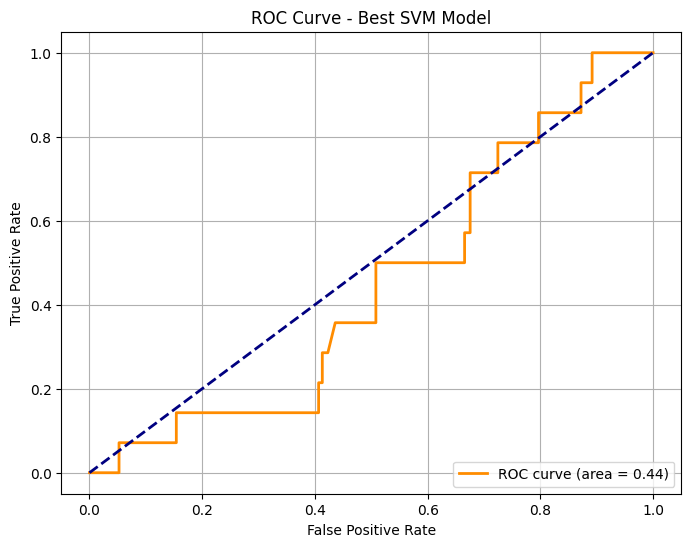

In [28]:
# Rebuild the best model with probability=True
best_params = grid_search.best_params_
best_svm_model = SVC(**best_params, probability=True)
best_svm_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_best = best_svm_model.predict(X_test)

# Evaluation
print("\nEvaluating the Best SVM model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

# ROC and AUC
y_proba_best = best_svm_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best SVM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


What went wrong? 

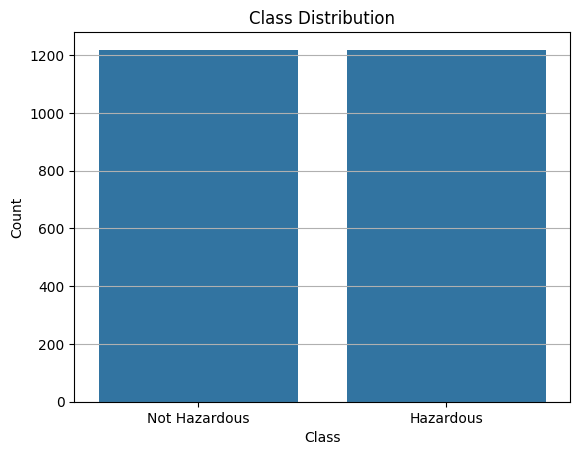

In [29]:
import seaborn as sns
import pandas as pd

# If in DataFrame
sns.countplot(x=y_resampled)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Not Hazardous', 'Hazardous'])
plt.grid(axis='y')
plt.show()


Class distribution shows equal distribution of targets in y

In [34]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Predict class probabilities
y_proba = best_svm_model.predict_proba(X_test)[:, 1]

# Optional: adjust threshold
y_pred = (y_proba >= 0.2).astype(int)

# Get detailed evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       305
           1       0.04      1.00      0.08        14

    accuracy                           0.04       319
   macro avg       0.02      0.50      0.04       319
weighted avg       0.00      0.04      0.00       319

ROC AUC: 0.44473067915690867


C:\Users\gautu\Documents\Projects\asteroid\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gautu\Documents\Projects\asteroid\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gautu\Documents\Projects\asteroid\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Confusion Matrix:
[[287  18]
 [  0  14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       305
           1       0.44      1.00      0.61        14

    accuracy                           0.94       319
   macro avg       0.72      0.97      0.79       319
weighted avg       0.98      0.94      0.95       319


Accuracy Score: 0.9435736677115988
ROC AUC: 0.9655737704918033


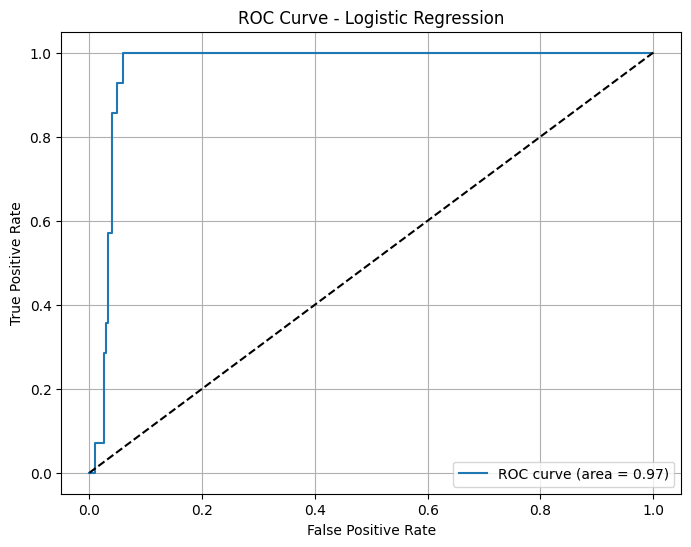

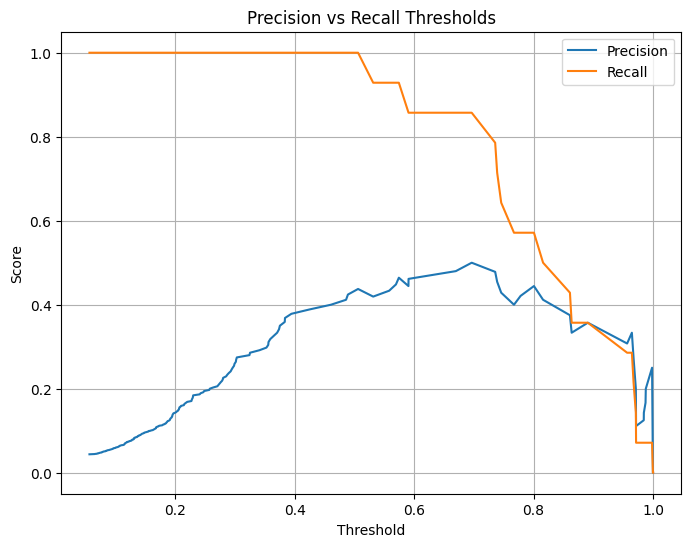

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    roc_curve, precision_recall_curve
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Split your data (already done)
# X_train, X_test, y_train, y_test = ...

# Step 2: Build pipeline with scaling + SMOTE + logistic regression
pipeline = ImbPipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Step 3: Fit the pipeline
pipeline.fit(X_train, y_train)

# Step 4: Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Step 5: Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 7: Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
custom_threshold = 0.70  # adjust between 0.65–0.75 based on exact values
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_proba))  # keep the same proba input


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       305
           1       0.48      0.79      0.59        14

    accuracy                           0.95       319
   macro avg       0.73      0.87      0.78       319
weighted avg       0.97      0.95      0.96       319

ROC AUC: 0.9655737704918033


In [41]:
import joblib

# Save the best model
joblib.dump(best_svm_model, 'svm_hazard_model.pkl')
print("Model saved successfully.")


Model saved successfully.
